# Generate seg images 2d & 2dt

Similar code as in Finding Centers

In [1]:
%%capture

import time
import copy
import numpy as np
from skimage.filters import gaussian
import cv2

from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave
import _pickle as pickle

%reload_ext autoreload
%autoreload 2

from netsurface2d import NetSurf2d
from netsurface2dt import NetSurf2dt
from data3d import Data3d

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon



In [2]:
#filename = '/Users/micha/Desktop/Uni und so/CBG HiWi/Downloads/MAX_LP320-06-08_Concat-51-100.tif'
filename = '/Users/micha/Desktop/Uni und so/CBG HiWi/Membrane Localization/Cell_Model-0.0.1-3D_Sim-PSF(0.2 0.2 0.6) PXS(0.1 0.1 0.1).tif'


stack = imread(filename)
segchannel = stack
print(segchannel.shape)
sigma = [0.,2.,2.]
segchannel_smooth = gaussian(segchannel,sigma)

(50, 134, 162)


In [7]:
max_rs = (segchannel[0].shape[1] /2 +20,
          segchannel[0].shape[1] / 2 +20)

min_rs = (1,1)


data = Data3d( segchannel_smooth, pixelsize=(1.,1.), silent=False )
data.set_seg_params(num_columns=72,K=100,max_delta_k=8)
objects = []

In [8]:
cell = data.init_object("cell 1")
objects.append(cell)

data.add_object_at( cell, min_rs, max_rs, frame=9, seed=(62,81), segment_it=True )

data.track(cell, seed_frame=9, target_frames=range(10,38), recenter_iterations=1)

Added appearance for "cell 1" in frame 9 with seed coordinates [62. 81.]
      Optimum energy:  0.05817395887526942
      Nodes in/out:  4255 2945
      Area:  11354.0
Added appearance for "cell 1" in frame 10 with seed coordinates [62. 81.]
      Optimum energy:  0.08698384410879799
      Nodes in/out:  4272 2928
      Area:  11440.0
    Updated center to [66.09722222 73.55555556]
Added appearance for "cell 1" in frame 11 with seed coordinates [66. 74.]
      Optimum energy:  0.12822955351957682
      Nodes in/out:  4359 2841
      Area:  11574.999999999996
    Updated center to [68.59722222 70.33333333]
Added appearance for "cell 1" in frame 12 with seed coordinates [69. 70.]
      Optimum energy:  0.16107230541595932
      Nodes in/out:  4393 2807
      Area:  11641.000000000004
    Updated center to [70.125      68.59722222]
Added appearance for "cell 1" in frame 13 with seed coordinates [70. 69.]
      Optimum energy:  0.16981055631370012
      Nodes in/out:  4405 2795
      Area:

In [9]:
#optional. If commented out, instead of 2dt-segmentation 2d-segmentation will happen.
data.segment2dt( cell, max_radial_delta=10 );

No results for frame: 0
No results for frame: 1
No results for frame: 2
No results for frame: 3
No results for frame: 4
No results for frame: 5
No results for frame: 6
No results for frame: 7
No results for frame: 8
Results for frame 9:
      Optimum energy:  2.3983630159421208
      Area:  11101.500000000002
Results for frame 10:
      Optimum energy:  2.3983630159421208
      Area:  11291.999999999987
Results for frame 11:
      Optimum energy:  2.3983630159421208
      Area:  11342.50000000001
Results for frame 12:
      Optimum energy:  2.3983630159421208
      Area:  11431.500000000005
Results for frame 13:
      Optimum energy:  2.3983630159421208
      Area:  11440.999999999996
Results for frame 14:
      Optimum energy:  2.3983630159421208
      Area:  11395.500000000007
Results for frame 15:
      Optimum energy:  2.3983630159421208
      Area:  11065.500000000002
Results for frame 16:
      Optimum energy:  2.3983630159421208
      Area:  8934.499999999996
Results for frame 1

In [10]:
segimgs = data.create_segmentation_image()

# Display segmented boundary

Displays only the frames from frame_start to frame_end
1. on the left: segmented images
2. on the right: original data

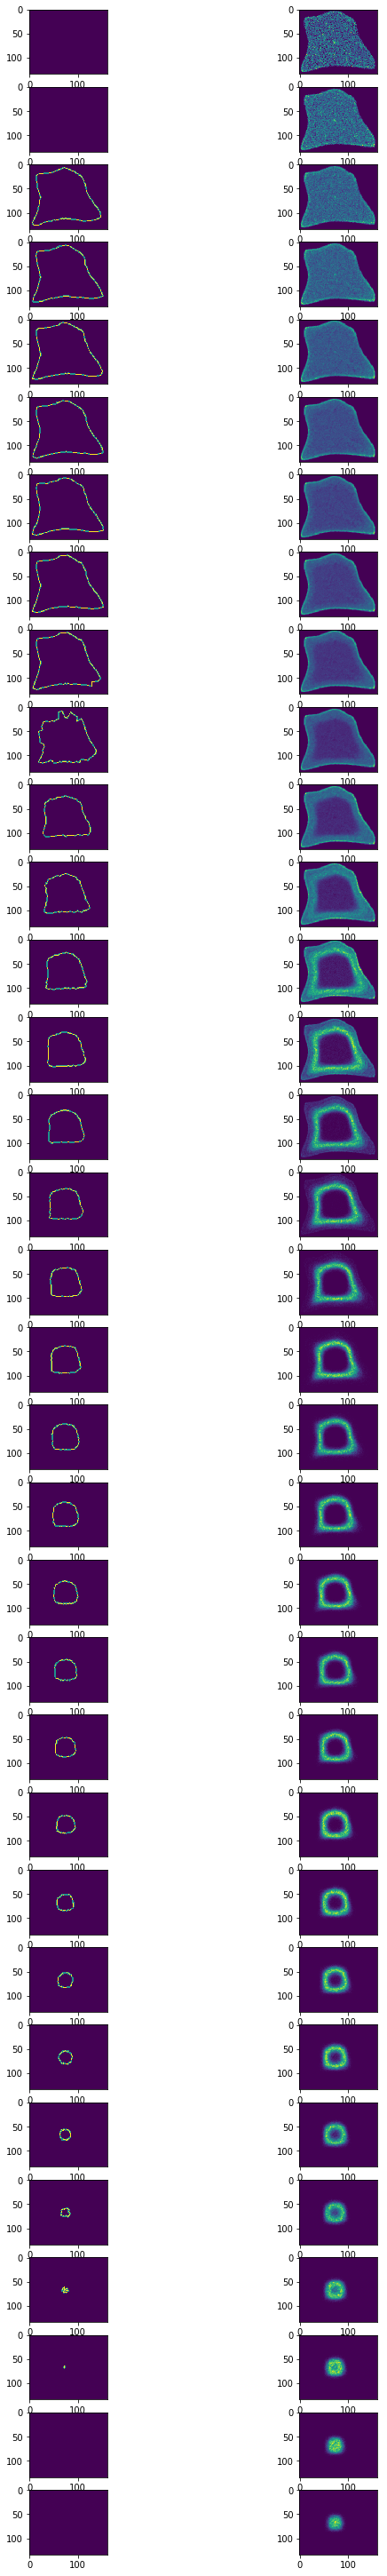

In [11]:
fig=plt.figure(figsize(10,80))
k=0
frame_start=7
frame_end=40
loop=range(frame_start,frame_end)
for i in loop:
    ax=fig.add_subplot(50,2,frame_start+k*2)
    ax.imshow(segimgs[i])
#    circle1 = plt.Circle((65, 73), 101 , color='r', fill=False)
#    ax.add_artist(circle1)
    ax.plot()
    ax=fig.add_subplot(50,2,frame_start+1+k*2)
    ax.imshow(segchannel[i-2])
    ax.plot
    k+=1

Displays only segmented boundaries

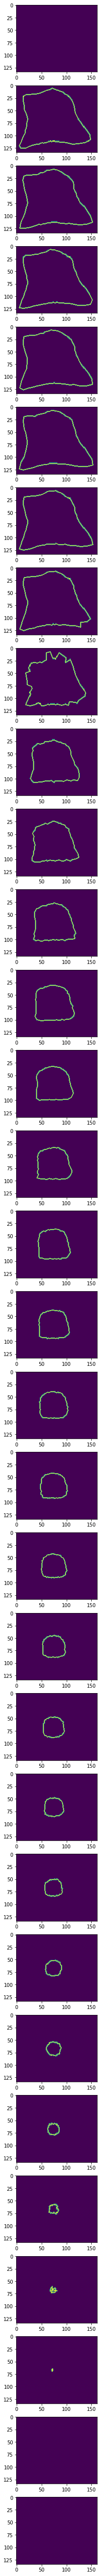

In [18]:
fig=plt.figure(figsize(10,150))
frame_start=8
frame_end=40
loop=range(frame_start,frame_end)
for i in loop:
    ax=fig.add_subplot(50,1,i)
    ax.imshow(segimgs[i])
#    circle1 = plt.Circle((65, 73), 101 , color='r', fill=False)
#    ax.add_artist(circle1)
    ax.plot()